In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install MTCNN

In [ ]:
import cv2 as cv

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
img = cv.imread("/content/drive/MyDrive/DATASET/dataset/robert_downey/2.jpg")
#open cv reads image as BGR format and matplotlib as RGB format

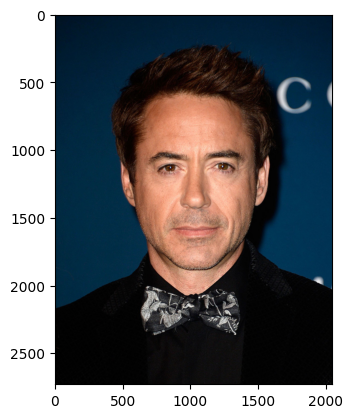

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
from mtcnn.mtcnn import MTCNN
!pip install lz4
#pip install "https://python-lz4.readthedocs.io/"
detector = MTCNN()
results = detector.detect_faces(img)

In [ ]:
results

[{'box': [629, 621, 840, 1260],
  'confidence': np.float64(0.9991820454597473),
  'keypoints': {'nose': [np.int64(1042), np.int64(1389)],
   'mouth_right': [np.int64(1200), np.int64(1555)],
   'right_eye': [np.int64(1221), np.int64(1123)],
   'left_eye': [np.int64(844), np.int64(1138)],
   'mouth_left': [np.int64(873), np.int64(1562)]}}]

In [ ]:
x,y,w,h = results[0]['box']

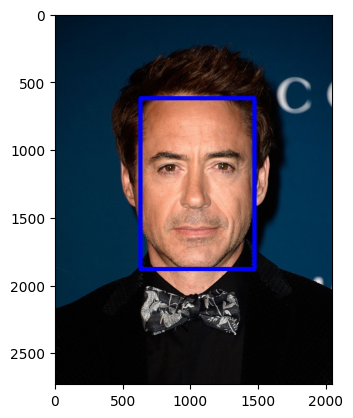

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

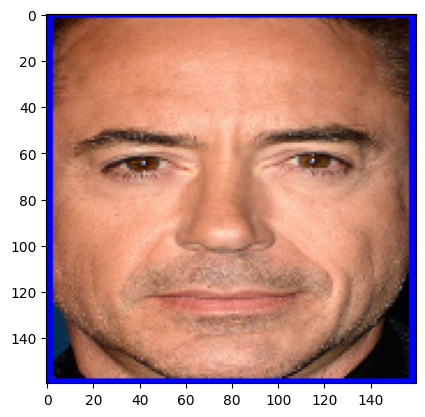

In [ ]:
face = img[y:y+h, x:x+w]
#facenet takes input as 160X160
face = cv.resize(face, (160,160))
plt.imshow(face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
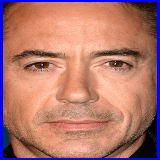

In [ ]:
face

#Automate the processing

In [ ]:
import os
import cv2 as cv
import numpy as np
from mtcnn import MTCNN
import matplotlib.pyplot as plt

class FACELOADING:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename):
    img = cv.imread(filename)
    if img is None:
      raise ValueError(f"Could not read image: {filename}")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    results = self.detector.detect_faces(img)
    if results:
      x, y, w, h = results[0]['box']
      x, y = abs(x), abs(y)
      face = img[y:y+h, x:x+w]
      face_arr = cv.resize(face, self.target_size)
      return face_arr
    else:
      raise ValueError("No face detected.")


  def load_faces(self, dir_path):
    FACES = []
    for im_name in os.listdir(dir_path):
      if im_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
          path = os.path.join(dir_path, im_name)
          single_face = self.extract_face(path)
          FACES.append(single_face)
        except Exception as e:
          print(f"Error loading {im_name}: {e}")
    return FACES

  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path = os.path.join(self.directory, sub_dir)
      if os.path.isdir(path):
        FACES = self.load_faces(path)
        labels = [sub_dir for _ in range(len(FACES))]
        print(f"Load successfully: {len(labels)}")
        self.X.extend(FACES)
        self.Y.extend(labels)
    return np.asarray(self.X), np.asarray(self.Y)

  def plot_images(self):
    plt.figure(figsize=(18,16))
    for num, image in enumerate(self.X):
      ncols = 4
      nrows = len(self.Y) // ncols + 1
      plt.subplot(nrows, ncols, num+1)
      plt.imshow(image)
      plt.axis('off')


In [ ]:
faceloading = FACELOADING("/content/drive/MyDrive/DATASET/dataset")
X, Y = faceloading.load_classes()

Load successfully: 10
Error loading 10.jpg: No face detected.
Load successfully: 9
Load successfully: 10
Load successfully: 0


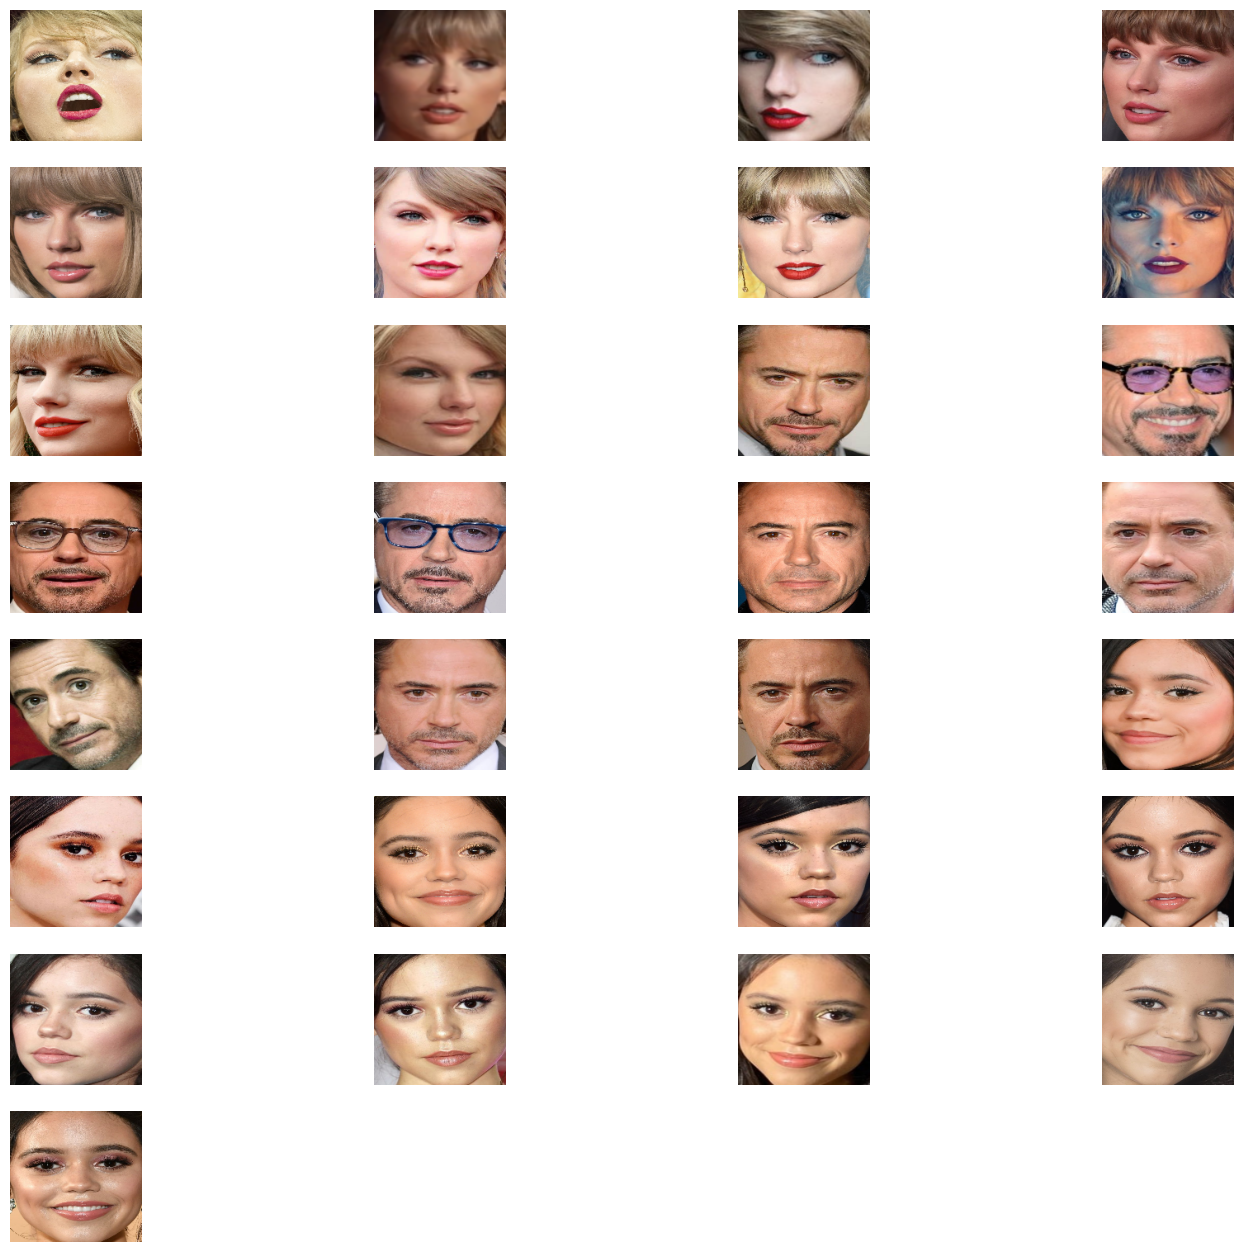

In [ ]:
faceloading.plot_images()

Facenet

In [ ]:
!pip install keras-facenet

In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
  face_img = face_img.astype('float32')
  face_img = np.expand_dims(face_img, axis=0)
  yhat = embedder.embeddings(face_img)
  return yhat[0]

In [ ]:
EMBEDDED_X = []

for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
np.savez_compressed('faces_embedding_done4classes.npz',EMBEDDED_X,Y)

SVM MODEL


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
Y


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Train Accuracy: ", accuracy_score(Y_train, ypreds_train))
print("Test Accuracy: ", accuracy_score(Y_test, ypreds_test))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [56]:
t_im = cv.imread("/content/drive/MyDrive/DATASET/Robert_new.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [57]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


In [58]:
test_im.shape


(512,)

In [59]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [60]:
ypreds


array([1])

In [61]:
encoder.inverse_transform(ypreds)

array(['robert_downey'], dtype='<U13')